# 1. Perkenalan

# 2. Import libraries

In [1]:
# Import tools dasar
import pandas as pd
import numpy as np
import tensorflow as tf

# Import tools EDA
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Import tools feature engineering
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils.class_weight import compute_class_weight
from imblearn.under_sampling import RandomUnderSampler


# Import tools preprocessing
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')

# Import libraries model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape, BatchNormalization, LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam

# Import tools model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Import tools model saving
import pickle
import json
import dill

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vickybelario/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/vickybelario/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vickybelario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vickybelario/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 3. Data Loading

In [2]:
# Membuat dataframe
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

# Atur lebar dataframe
pd.set_option('display.max_colwidth', 250)

In [3]:
# Cek 5 baris pertama
df.head()

,Review,Rating
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff ...",4
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like ...",2
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wa...",3
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy...",5
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely ...",5


In [4]:
# Cek 5 baris terakhir
df.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5-star ca n't beat, time stayed increased esteem, bw caters business crowd stayed leisure usually weekend, rate perfect, clean green request available drop-dead view space needle practically street, as...",5
20487,great location price view hotel great quick place sights.directly street space needle downtown tram science center downtown mall.amenities nice indoor pool kids secure underground parking garage great restaurant.rooms great size couples families....,4
20488,"ok just looks nice modern outside, desk staff n't particularly friendly, corridors dark smelt steam cleaned carpet maybe good thing, hotel right space needle thrilling pulled mins walk away, unfortunately room rear view buildings parking lot, roo...",2
20489,"hotel theft ruined vacation hotel opened sept 17 2007 guests week, happy stumble scouting hotels apt stay booked gobcn- commented post unexpectedly cancelled arrival stuck place stay la merce festival barcelona biggest year, like trying hotel tim...",1
20490,"people talking, ca n't believe excellent ratings hotel, just n't, yes patricia extremely helpful fluent languages goes way make welcome, said place bit dump, inexpensive hotel expensive city place bit dated institutional odor charm funeral home, ...",2


In [5]:
# Cek basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


### 3.1. Cek baris duplikat

In [6]:
# Cek jumlah baris duplikat
df.duplicated().sum()

0

In [7]:
# Cek hasil
df.duplicated().sum()

0

### 3.2. Cek missing values

In [8]:
# Cek jumlah missing values
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [9]:

# Define a function to map rating numbers to alternative sentiment words
def rating_to_sentiment(rating):
    if rating == 1:
        return "Terrible"
    elif rating == 2:
        return "Bad"
    elif rating == 3:
        return "Average"
    elif rating == 4:
        return "Good"
    elif rating == 5:
        return "Excellent"

# Apply the function to the Rating column
df['Sentiment'] = df['Rating'].apply(rating_to_sentiment)

# View the updated DataFrame
print(df[['Review', 'Rating', 'Sentiment']])

                                                                                                                                                                                                                                                          Review  \
0      nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff ...   
1      ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like ...   
2      nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk d

In [10]:
df

,Review,Rating,Sentiment
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff ...",4,Good
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like ...",2,Bad
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wa...",3,Average
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy...",5,Excellent
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely ...",5,Excellent
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5-star ca n't beat, time stayed increased esteem, bw caters business crowd stayed leisure usually weekend, rate perfect, clean green request available drop-dead view space needle practically street, as...",5,Excellent
20487,great location price view hotel great quick place sights.directly street space needle downtown tram science center downtown mall.amenities nice indoor pool kids secure underground parking garage great restaurant.rooms great size couples families....,4,Good
20488,"ok just looks nice modern outside, desk staff n't particularly friendly, corridors dark smelt steam cleaned carpet maybe good thing, hotel right space needle thrilling pulled mins walk away, unfortunately room rear view buildings parking lot, roo...",2,Bad
20489,"hotel theft ruined vacation hotel opened sept 17 2007 guests week, happy stumble scouting hotels apt stay booked gobcn- commented post unexpectedly cancelled arrival stuck place stay la merce festival barcelona biggest year, like trying hotel tim...",1,Terrible


In [11]:
import re
from nltk.tokenize import word_tokenize

# Membuat list penampung kata - kata
Terriblewords = []
Badwords = []
Averagewords = []
Goodwords = []
Excellentwords = []

# Contoh pengolahan
for impress in df['Sentiment'].unique():
    for i in df.loc[df['Sentiment'] == impress]['Review']:
        # Hapus karakter - karakter yang tidak termasuk huruf
        i = re.sub(r"[^A-Za-z\s']", " ", i)  # Use a raw string here
        # Mengubah huruf kapital menjadi huruf kecil
        words = word_tokenize(i.lower())
        
        if impress == 'Terrible':
            Terriblewords.extend(words)
        elif impress == 'Bad':
            Badwords.extend(words)
        elif impress == 'Average':
            Averagewords.extend(words)
        elif impress == 'Good':
            Goodwords.extend(words)
        elif impress == 'Excellent':
            Excellentwords.extend(words)


In [12]:
# Cek jumlah kata pada masing - masing kategori sentiment
print(f'Total kata pada kalimat dengan kesan Terrible : {len(Terriblewords)}')
print(f'Total kata pada kalimat dengan kesan Bad : {len(Badwords)}')
print(f'Total kata pada kalimat dengan kesan Average : {len(Averagewords)}')
print(f'Total kata pada kalimat dengan kesan Good : {len(Goodwords)}')
print(f'Total kata pada kalimat dengan kesan Excellent : {len(Excellentwords)}')
print(f'Total kata pada seluruh kalimat : {len(Terriblewords) + len(Badwords) + len(Averagewords) + len(Goodwords) + len(Excellentwords)}')



Total kata pada kalimat dengan kesan Terrible : 159224
Total kata pada kalimat dengan kesan Bad : 226962
Total kata pada kalimat dengan kesan Average : 250767
Total kata pada kalimat dengan kesan Good : 652167
Total kata pada kalimat dengan kesan Excellent : 854457
Total kata pada seluruh kalimat : 2143577


In [13]:
# Membuat dataframe untuk masing - masing list
Terriblewords = pd.DataFrame(Terriblewords,columns=['Words'])
Badwords = pd.DataFrame(Badwords,columns=['Words'])
Averagewords = pd.DataFrame(Averagewords,columns=['Words'])
Goodwords = pd.DataFrame(Goodwords,columns=['Words'])
Excellentwords = pd.DataFrame(Excellentwords,columns=['Words'])

In [14]:
# Cek hasil
Terriblewords

,Words
0,horrible
1,customer
2,service
3,hotel
4,stay
...,...
159219,barcelona
159220,city
159221,fabulous
159222,encourage


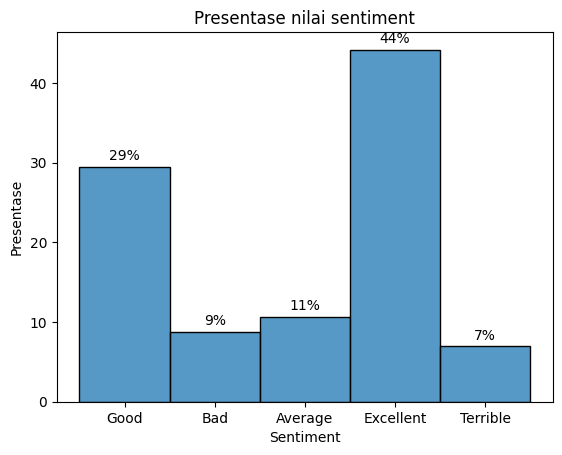

In [15]:
# Membuat grafik histogram
ax = sns.histplot(data=df, x="Sentiment",stat='percent')
# Menampilkan nilai presentase pada tiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3, fontsize=10, color='black')
plt.title('Presentase nilai sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Presentase')
plt.show()

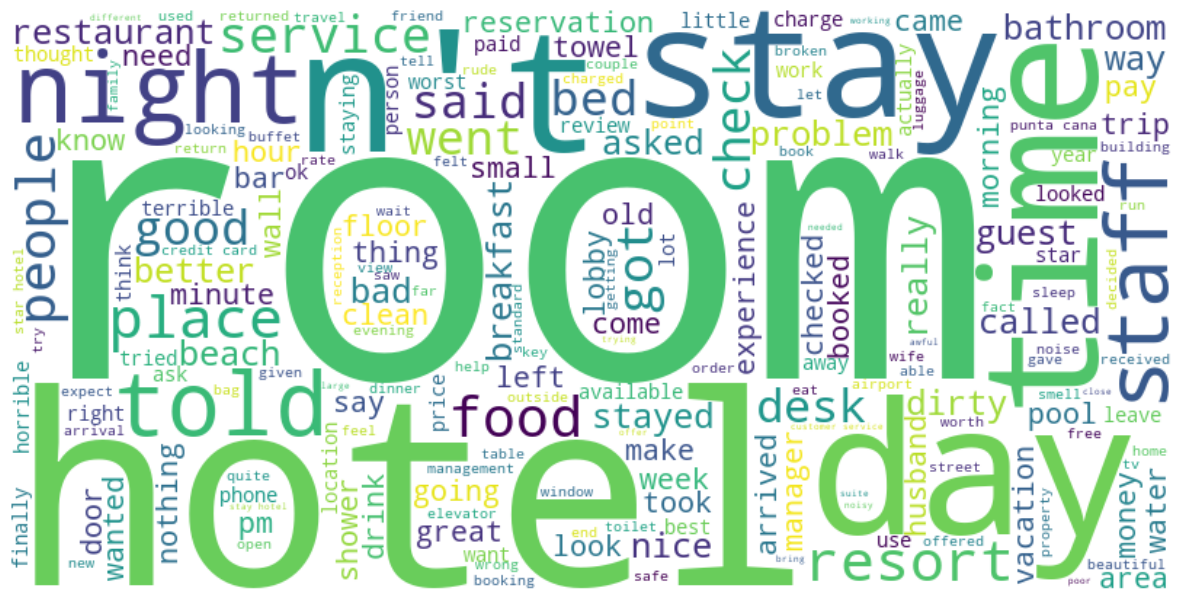

In [16]:
# Menampilkan kata - kata yang paling sering muncul pada kelas positive dengan wordcloud
text_data = Terriblewords['Words'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Menampilkan figure
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

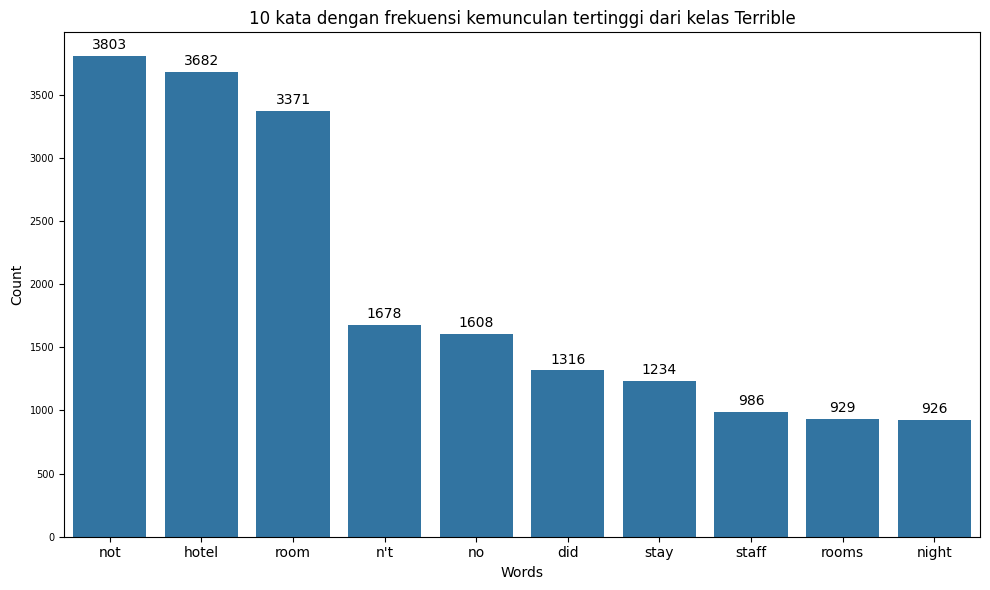

In [17]:
# Hitung frekuensi setiap nilai dalam kolom
freqWords = Terriblewords['Words'].value_counts()

# Pilih 10 kata teratas yang paling sering muncul
top_10_words = freqWords.nlargest(10).index

# Filter dataframe
filtered_df = Terriblewords[Terriblewords['Words'].isin(top_10_words)]

# Membuat figure countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=filtered_df, x="Words",order=top_10_words)

# Menambahkan nilai pada setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(int(height), xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Menambahkan judul dan label
plt.title('10 kata dengan frekuensi kemunculan tertinggi dari kelas Terrible')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=7)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [18]:
# Melihat hasil fungsi describe()
Terriblewords.describe()

,Words
count,159224
unique,13521
top,not
freq,3803


In [19]:
# Membuat objek stopwords
stpwds_en = list(set(stopwords.words()))

# Membuat objek lemmatizer
lemmatizer = WordNetLemmatizer()

In [20]:
# Copy dataframe
dfCop = df.copy(deep=True)

In [21]:
# Fungsi untuk melakukan text preprocessing
def Review_preprocessing(Review):
  # Case folding
  Review = Review.lower()
  
  # Newline removal (\n)
  Review = re.sub(r"\\n", " ",Review)
  
  # Whitespace removal
  Review = Review.strip()

  # URL removal
  Review = re.sub(r"http\S+", " ", Review)
  Review = re.sub(r"www.\S+", " ", Review)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  Review = re.sub("[^A-Za-z\s']", " ", Review)

  # Menghapus karakter '
  Review = re.sub("'"," ", Review)

  # Tokenization
  tokens = word_tokenize(Review)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stpwds_en]

  # Stemming
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  # Menggabungkan token
  Review = ' '.join(tokens)

  return Review

<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/var/folders/dm/ynt2nsnj2sqcvbyrk30jqscc0000gn/T/ipykernel_82076/1068600823.py:17: SyntaxWarning: invalid escape sequence '\s'
  Review = re.sub("[^A-Za-z\s']", " ", Review)


In [22]:
# Menerapkan fungsi pada setiap baris kolom text
dfCop['Review_processed'] = dfCop['Review'].apply(lambda x: Review_preprocessing(x))

In [23]:
# Cek hasil
dfCop.head()

,Review,Rating,Sentiment,Review_processed
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff ...",4,Good,nice expensive parking deal stay anniversary arrived late evening advice previous review valet parking check quick easy disappointed existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof heard music room n...
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like ...",2,Bad,special charge diamond member hilton decided chain shot anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard room printed reservation desk showed thing tv couch ect desk clerk told mixed suite desc...
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wa...",3,Average,nice room experience monaco seattle level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch ...
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy...",5,Excellent,unique great stay wonderful time monaco location excellent short stroll downtown shopping area friendly room showed sign animal hair smell monaco suite sleeping area big striped curtain pulled closed nice touch felt cosy goldfish named brandi enj...
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely ...",5,Excellent,great stay great stay seahawk game awesome downfall view building complain room huge staff helpful booked hotel website seahawk package charge parking voucher taxi problem taxi driver accept voucher barely spoke english funny speak arabic called ...


In [24]:
# Membuat list penampung kata - kata
Terriblewords2 = []
Badwords2 = []
Averagewords2 = []
Goodwords2 = []
Excellentwords2 = []

# pengolahan
for impress in dfCop['Sentiment'].unique():
    for i in dfCop.loc[dfCop['Sentiment'] == impress]['Review_processed']:
        # Hapus karakter - karakter yang tidak termasuk huruf
        i = re.sub(r"[^A-Za-z\s']", " ", i)  # Use a raw string here
        # Mengubah huruf kapital menjadi huruf kecil
        words2 = word_tokenize(i.lower())
        
        if impress == 'Terrible':
            Terriblewords2.extend(words2)
        elif impress == 'Bad':
            Badwords2.extend(words2)
        elif impress == 'Average':
            Averagewords2.extend(words2)
        elif impress == 'Good':
            Goodwords2.extend(words2)
        elif impress == 'Excellent':
            Excellentwords2.extend(words2)


In [25]:
# Cek jumlah kata pada masing - masing kategori sentiment
print(f'Total kata pada kalimat dengan kesan Terrible : {len(Terriblewords2)}')
print(f'Total kata pada kalimat dengan kesan Bad : {len(Badwords2)}')
print(f'Total kata pada kalimat dengan kesan Average : {len(Averagewords2)}')
print(f'Total kata pada kalimat dengan kesan Good : {len(Goodwords2)}')
print(f'Total kata pada kalimat dengan kesan Excellent : {len(Excellentwords2)}')
print(f'Total kata pada seluruh kalimat : {len(Terriblewords2) + len(Badwords2) + len(Averagewords2) + len(Goodwords2) + len(Excellentwords2)}')



Total kata pada kalimat dengan kesan Terrible : 124262
Total kata pada kalimat dengan kesan Bad : 176597
Total kata pada kalimat dengan kesan Average : 196110
Total kata pada kalimat dengan kesan Good : 523039
Total kata pada kalimat dengan kesan Excellent : 696434
Total kata pada seluruh kalimat : 1716442


In [26]:
# Membuat dataframe untuk masing - masing list
Terriblewords2 = pd.DataFrame(Terriblewords2,columns=['Words2'])
Badwords2 = pd.DataFrame(Badwords2,columns=['Words2'])
Averagewords2 = pd.DataFrame(Averagewords2,columns=['Words2'])
Goodwords2 = pd.DataFrame(Goodwords2,columns=['Words2'])
Excellentwords2 = pd.DataFrame(Excellentwords2,columns=['Words2'])

In [27]:
# Cek hasil
Terriblewords2

,Words2
0,horrible
1,customer
2,service
3,stay
4,february
...,...
124257,barcelona
124258,city
124259,fabulous
124260,encourage


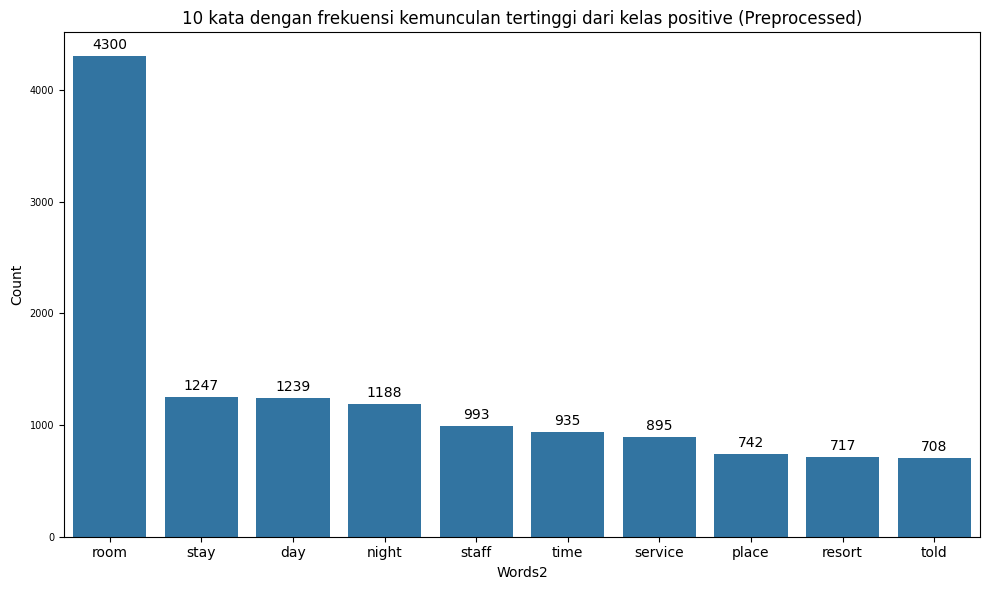

In [28]:
# Hitung frekuensi setiap nilai dalam kolom
freqWords = Terriblewords2['Words2'].value_counts()

# Pilih 10 kata teratas yang paling sering muncul
top_10_words = freqWords.nlargest(10).index

# Filter dataFrame 
filtered_df = Terriblewords2[Terriblewords2['Words2'].isin(top_10_words)]

# Membuat figure countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=filtered_df, x="Words2",order=top_10_words)

# Menambahkan anotasi pada setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(int(height), xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Menambahkan judul dan label
plt.title('10 kata dengan frekuensi kemunculan tertinggi dari kelas positive (Preprocessed)')
plt.xlabel('Words2')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=7)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [29]:
dfCop

,Review,Rating,Sentiment,Review_processed
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff ...",4,Good,nice expensive parking deal stay anniversary arrived late evening advice previous review valet parking check quick easy disappointed existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof heard music room n...
1,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like ...",2,Bad,special charge diamond member hilton decided chain shot anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard room printed reservation desk showed thing tv couch ect desk clerk told mixed suite desc...
2,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wa...",3,Average,nice room experience monaco seattle level positive large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized missed separate wakeup call concierge busy hard touch ...
3,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy...",5,Excellent,unique great stay wonderful time monaco location excellent short stroll downtown shopping area friendly room showed sign animal hair smell monaco suite sleeping area big striped curtain pulled closed nice touch felt cosy goldfish named brandi enj...
4,"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely ...",5,Excellent,great stay great stay seahawk game awesome downfall view building complain room huge staff helpful booked hotel website seahawk package charge parking voucher taxi problem taxi driver accept voucher barely spoke english funny speak arabic called ...
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5-star ca n't beat, time stayed increased esteem, bw caters business crowd stayed leisure usually weekend, rate perfect, clean green request available drop-dead view space needle practically street, as...",5,Excellent,secret rd time staying charm star beat time stayed increased esteem bw caters business crowd stayed leisure weekend rate perfect clean green request available drop dead view space needle practically street check make walk belltown short block cho...
20487,great location price view hotel great quick place sights.directly street space needle downtown tram science center downtown mall.amenities nice indoor pool kids secure underground parking garage great restaurant.rooms great size couples families....,4,Good,great location price view great quick place sight directly street space needle downtown tram science center downtown mall amenity nice indoor pool kid secure underground parking garage great restaurant room great size couple family recommend visi...
20488,"ok just looks nice modern outside, desk staff n't particularly friendly, corridors dark smelt steam cleaned carpet maybe good thing, hotel right space needle thrilling pulled mins walk away, unfortunately room rear view buildings parking lot, roo...",2,Bad,nice modern desk staff particularly friendly corridor dark smelt steam cle

In [30]:
# Data Splitting
Xtrain_val, Xtest, ytrain_val, ytest = train_test_split(dfCop.Review_processed,
                                                    dfCop.Rating,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=dfCop.Rating)

Xtrain, Xval, ytrain, yval = train_test_split(Xtrain_val,
                                                  ytrain_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=ytrain_val)

In [31]:
# Cek total baris
print('Total baris data X_train : ', len(Xtrain))
print('Total baris data X_val   : ', len(Xval))
print('Total baris data X_test  : ', len(Xtest))

Total baris data X_train :  15675
Total baris data X_val   :  1742
Total baris data X_test  :  3074


In [32]:
# Cek hasil X_train
Xtrain

13960                                                                                                                                                                               loved stayed family favorite service excellent location train station recomend
6342                                                   holiday holiday public area fancy acceptable class service room kinda dated comfortable clean restaurant serve pretty decent breakfast pastry location wise block away nearest station bit walking involved
3109     staff great boyfriend family member age stayed melia febuary stayed caribe room close beach pool beach restraunt room nice maid service expected family stayed room close fresh towel tipped left gift daily basis resort beach beautiful food average...
2912     amazing boyfriend stayed bavaro princess march apprehensive reading review posting review staying worry place beautiful loved winding scenic trail property room minute walk beach pool ideal location walk lot tram r

In [33]:
# Cek hasil y_train
ytrain

13960    5
6342     3
3109     4
2912     5
1258     3
        ..
6885     5
10716    3
16793    4
4306     5
16892    5
Name: Rating, Length: 15675, dtype: int64

In [34]:
# Encoding dataset target menggunakan metode one hot encoding 
ytrain_ohe = to_categorical(ytrain)
yval_ohe = to_categorical(yval)
ytest_ohe = to_categorical(ytest)

In [35]:
# Cek hasil
ytrain_ohe

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [36]:
# Membuat object CountVectorizer()
vectorizer = CountVectorizer()
Xtrain_vec = vectorizer.fit_transform(Xtrain)
Xtest_vec = vectorizer.transform(Xtest)

In [37]:
# Cek hasil
Xtrain_vec

<15675x38310 sparse matrix of type '<class 'numpy.int64'>'
	with 1051122 stored elements in Compressed Sparse Row format>

In [38]:
# Cek vocab
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaaa', ..., 'zytec', 'zzzt', 'zzzzt'], dtype=object)

In [39]:
# Menhitung total vocab
total_vocab = len(vectorizer.vocabulary_.keys())

# Kalimat dengan jumlah token tertinggi
max_token = max([len(i.split(" ")) for i in Xtrain])

# Menampilkan total vocab dan maksimal tokens
print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_token, 'tokens')

Total Vocab :  38310
Maximum Sentence Length :  1515 tokens


In [40]:
# Text Vectorization
text_vectorization = TextVectorization(
    max_tokens=total_vocab,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int",
    output_sequence_length=max_token
)

# Adapt vectorization layer to the training data
text_vectorization.adapt(Xtrain)


In [41]:
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_token)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [42]:
# Checking the unique classes in ytrain
unique_classes = np.unique(ytrain)
print("Unique classes in ytrain:", unique_classes)

# Calculate class weights based on the class distribution
class_weights = compute_class_weight('balanced', classes=unique_classes, y=ytrain)

# Convert the class weights to a dictionary with labels as keys
class_weight_dict = dict(zip(unique_classes, class_weights))

# Check the resulting class weight dictionary
print("Class weight dictionary:", class_weight_dict)


Unique classes in ytrain: [1 2 3 4 5]
Class weight dictionary: {1: 2.8840846366145354, 2: 2.2849854227405246, 3: 1.877245508982036, 4: 0.6785714285714286, 5: 0.4526422177302917}


In [43]:
# Cek hasil
class_weight_dict

{1: 2.8840846366145354,
 2: 2.2849854227405246,
 3: 1.877245508982036,
 4: 0.6785714285714286,
 5: 0.4526422177302917}

In [44]:
# Membuat list sample weigth
sample_weights = np.array([class_weight_dict[label] for label in ytrain])

In [45]:
# Cek hasil
sample_weights

array([0.45264222, 1.87724551, 0.67857143, ..., 0.67857143, 0.45264222,
       0.45264222])

In [46]:
# Clear Session
import os
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Membuat arsitektur
model_gru_1 = Sequential()
model_gru_1.add(text_vectorization)  # Text Vectorization layer
model_gru_1.add(embedding)  # Embedding layer
model_gru_1.add(Bidirectional(GRU(50, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed))))
model_gru_1.add(Bidirectional(GRU(50, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed))))
model_gru_1.add(Dense(6, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)))

# Compile arsitektur dan parameter - parameternya
model_gru_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

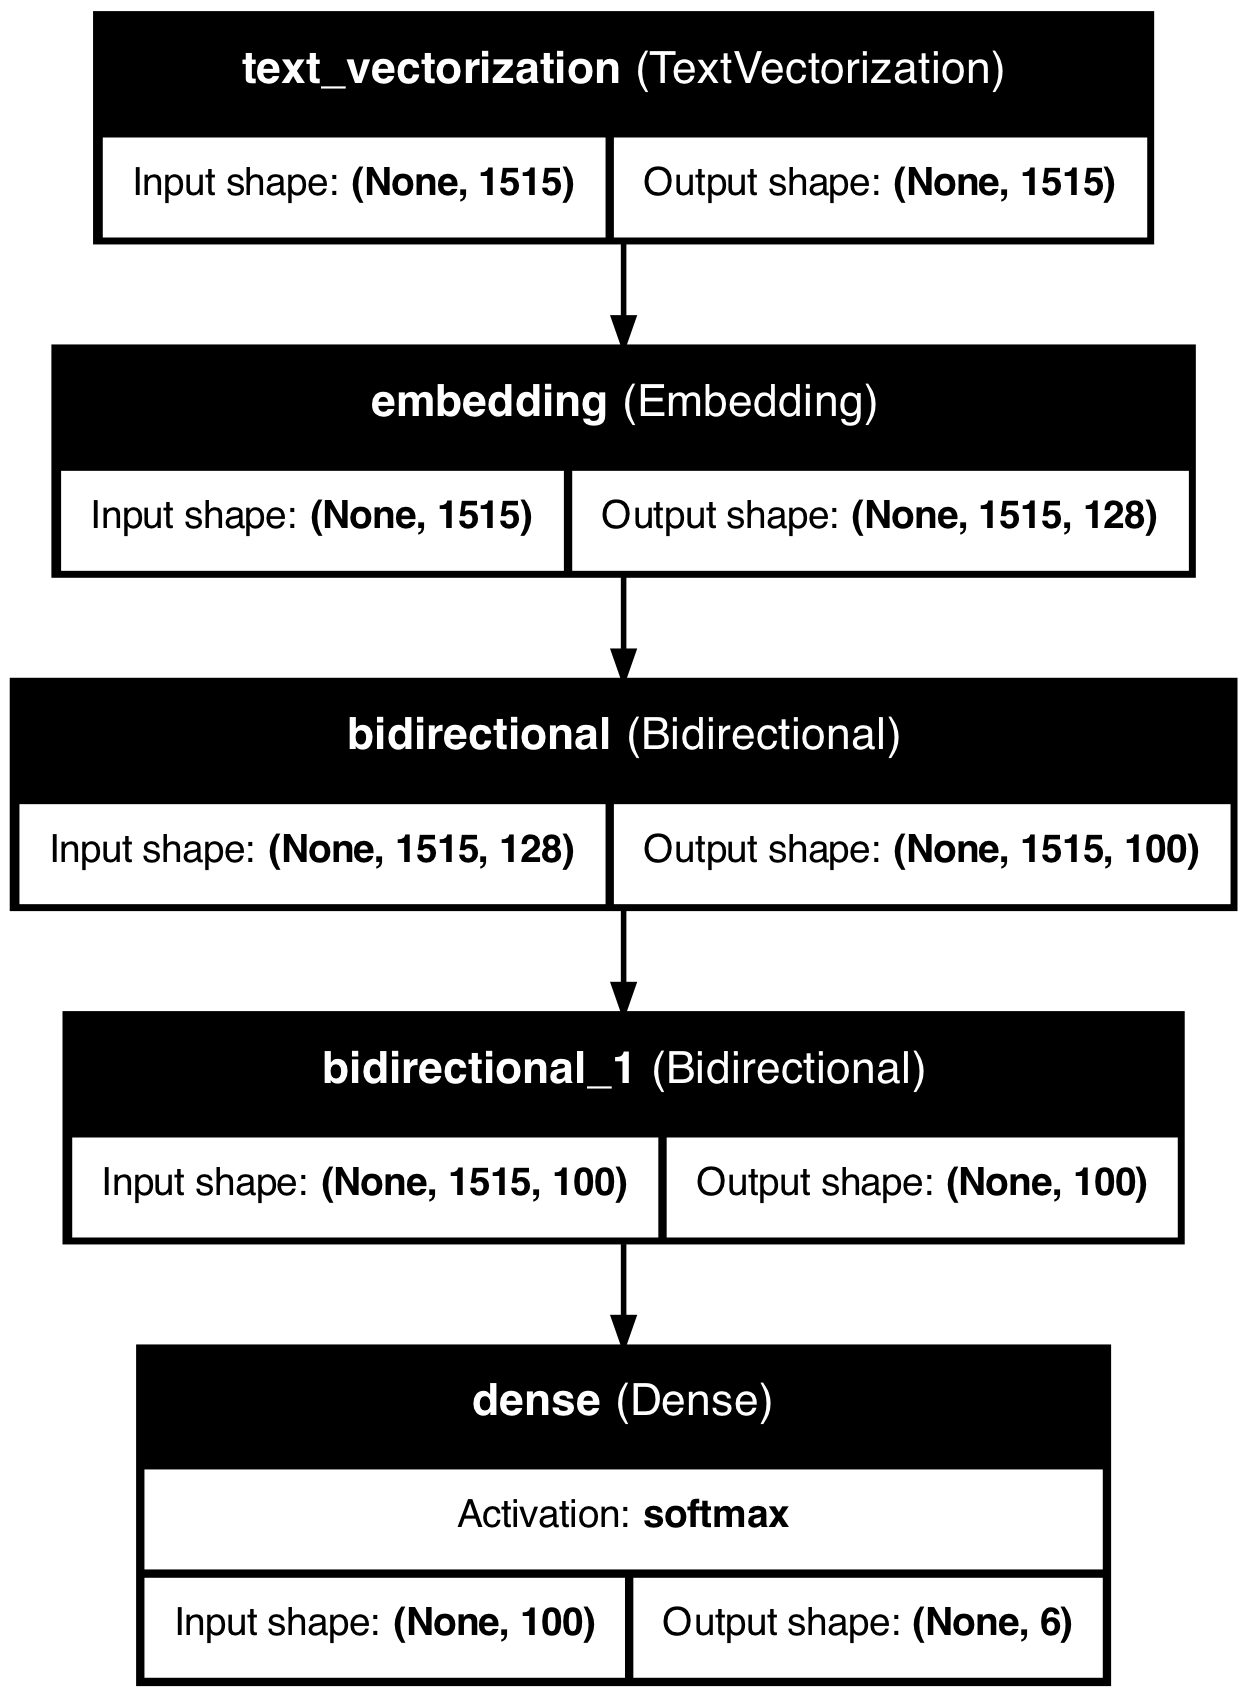

In [47]:
# Build the model explicitly
model_gru_1.build(input_shape=(None, max_token))

# Visualize the model
tf.keras.utils.plot_model(model_gru_1, show_shapes=True, show_layer_names=True, show_layer_activations=True)


In [48]:
# Proses training model dan validasi
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
model_gru_1_hist = model_gru_1.fit(Xtrain, ytrain_ohe, epochs=100, validation_data=(Xval, yval_ohe), class_weight=class_weight_dict, callbacks=[early_stopping])


Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 642s 1s/step - accuracy: 0.4041 - loss: 1.3475 - val_accuracy: 0.5608 - val_loss: 0.9801
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 891s 2s/step - accuracy: 0.6315 - loss: 0.8601 - val_accuracy: 0.5970 - val_loss: 0.9920
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 754s 2s/step - accuracy: 0.7174 - loss: 0.6364 - val_accuracy: 0.5568 - val_loss: 1.1608
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 698s 1s/step - accuracy: 0.7713 - loss: 0.5000 - val_accuracy: 0.5098 - val_loss: 1.3447
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 686s 1s/step - accuracy: 0.8181 - loss: 0.3836 - val_accuracy: 0.5729 - val_loss: 1.3536
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 678s 1s/step - accuracy: 0.8625 - loss: 0.2989 - val_accuracy: 0.5660 - val_loss: 1.4527
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 770s 2s/step - accuracy: 0.8990 - loss: 0.2056 - val_accuracy: 0.5367 - val_loss: 1.6478
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 730s 1s/step - accuracy: 0.9233 - loss: 0.1565 - 

In [49]:
print(Xtrain[:5])
print(Xtrain.dtype)


13960                                                                                                                                                                               loved stayed family favorite service excellent location train station recomend
6342                                                   holiday holiday public area fancy acceptable class service room kinda dated comfortable clean restaurant serve pretty decent breakfast pastry location wise block away nearest station bit walking involved
3109     staff great boyfriend family member age stayed melia febuary stayed caribe room close beach pool beach restraunt room nice maid service expected family stayed room close fresh towel tipped left gift daily basis resort beach beautiful food average...
2912     amazing boyfriend stayed bavaro princess march apprehensive reading review posting review staying worry place beautiful loved winding scenic trail property room minute walk beach pool ideal location walk lot tram r

In [50]:
# Membuat dataframe penampung nilai matriks evaluasi
matriks = pd.DataFrame({'Matrices': ['Precision train', 'Precision test', 'Recall train', 'Recall test',
                                     'Accuracy train', 'Accuracy test', 'Different of Accuracy (Test - Train)', 
                                     'F1 score train', 'F1 score test', 'Different of F1 Score (Test - Train)']})

# Membuat fungsi untuk menghitung nilai matriks evaluasi
def matrices(ypred_train_proba, ypred_test_proba, modelname):
    
    global ytrain, ytest
    
    # Konversi hasil probabilitas ke kelas 
    ypred_train = np.argmax(ypred_train_proba, axis=1)
    ypred_test = np.argmax(ypred_test_proba, axis=1)
    
    # Evaluasi dengan precision
    precision_train = round(precision_score(ytrain, ypred_train, average='macro'), 2)
    precision_test = round(precision_score(ytest, ypred_test, average='macro'), 2)

    # Evaluasi dengan recall
    recall_train = round(recall_score(ytrain, ypred_train, average='macro'), 2)
    recall_test = round(recall_score(ytest, ypred_test, average='macro'), 2)

    # Evaluasi dengan accuracy
    accuracy_train = round(accuracy_score(ytrain, ypred_train), 2)
    accuracy_test = round(accuracy_score(ytest, ypred_test), 2)

    # Evaluasi dengan F1 score
    f1train = round(f1_score(ytrain, ypred_train, average='macro'), 2)
    f1test = round(f1_score(ytest, ypred_test, average='macro'), 2)

    # Evaluasi perbedaan accuracy antara train dengan test
    different_acc = round((accuracy_test - accuracy_train), 2)

    # Evaluasi perbedaan F1 score antara train dengan test
    different_f1 = round((f1test - f1train), 2)

    matriks[modelname] = [precision_train, precision_test, recall_train, recall_test, accuracy_train, accuracy_test, 
                          different_acc, f1train, f1test, different_f1]


In [51]:
# Membuat fungis untuk menampilkan dataframe beserta confussion matrix
def confuss(ypred, modelname, matriks) :
    # Membuat figure dan axis
    fig, ax = plt.subplots(1, 2, figsize=(16, 7))

    # Menampilkan dataframe 
    ax[0].axis('tight')
    ax[0].axis('off')
    table = ax[0].table(cellText=matriks.loc[:,['Matrices',modelname]].values, colLabels=matriks.loc[:,['Matrices',modelname]].columns, cellLoc='center', loc='center')

    global ytest

    # Menampilkan confusion matrix 
    sns.heatmap(confusion_matrix(ytest, ypred),
                annot=True,
                fmt='g',
                xticklabels=['Negative','Neutral', 'Positive'],
                yticklabels=['Negative','Neutral', 'Positive'],
                ax=ax[1])
    ax[1].set_title(f'Confusion Matrix - {modelname} (Test)')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Actual')
    # plt.tight_layout()
    plt.show()

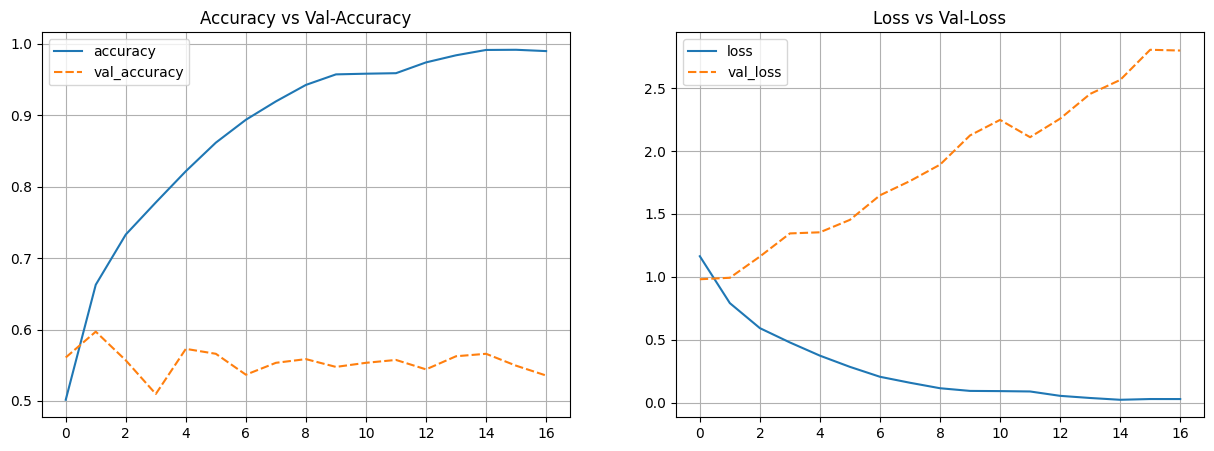

In [52]:
# Membuat dataframe nilai accuracy dan loss 
model_gru_1_hist_df = pd.DataFrame(model_gru_1_hist.history)

# Membuat figure perbandingan nilai accuracy dataset training dengan nilai loss dataset validation
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_gru_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

# Membuat figure perbandingan nilai loss dataset training dengan nilai loss dataset validation
plt.subplot(1, 2, 2)
sns.lineplot(data=model_gru_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [53]:
# Memprediksi dataset test
ytest_predGRU = model_gru_1.predict(Xtest) 
ytrain_predGRU = model_gru_1.predict(Xtrain)

97/97 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step
490/490 ━━━━━━━━━━━━━━━━━━━━ 130s 266ms/step


In [54]:
# Evaluate Test Set
result_gru_test = model_gru_1.evaluate(Xtest, ytest_ohe)
result_gru_test

97/97 ━━━━━━━━━━━━━━━━━━━━ 27s 273ms/step - accuracy: 0.5773 - loss: 1.0109


[1.0103470087051392, 0.576447606086731]

In [55]:
# Evaluate traing Set
result_gru_train = model_gru_1.evaluate(Xtrain, ytrain_ohe)
result_gru_train

490/490 ━━━━━━━━━━━━━━━━━━━━ 124s 253ms/step - accuracy: 0.7602 - loss: 0.5941


[0.6019392609596252, 0.7524082660675049]

In [56]:
# Get class with maximum probability
ytest_predGRU_max = np.argmax(ytest_predGRU, axis=-1)
ytrain_predGRU_max = np.argmax(ytrain_predGRU, axis=-1)

In [57]:
# Membuat label kelas
class_name = ['Terrible', 'Bad', 'Average','Good','Excellent']

In [58]:
## Display Classification Report
print(classification_report(ytest, ytest_predGRU_max, target_names=np.array(class_name)))

              precision    recall  f1-score   support

    Terrible       0.72      0.47      0.57       213
         Bad       0.44      0.38      0.41       269
     Average       0.31      0.58      0.41       328
        Good       0.51      0.36      0.42       906
   Excellent       0.72      0.78      0.75      1358

    accuracy                           0.58      3074
   macro avg       0.54      0.51      0.51      3074
weighted avg       0.59      0.58      0.57      3074



In [59]:
# Membuat dataframe perbandingan nilai matriks evaluasi antara test dan train (macro average)
matrices(ytrain_predGRU, ytest_predGRU, 'GRU_1')

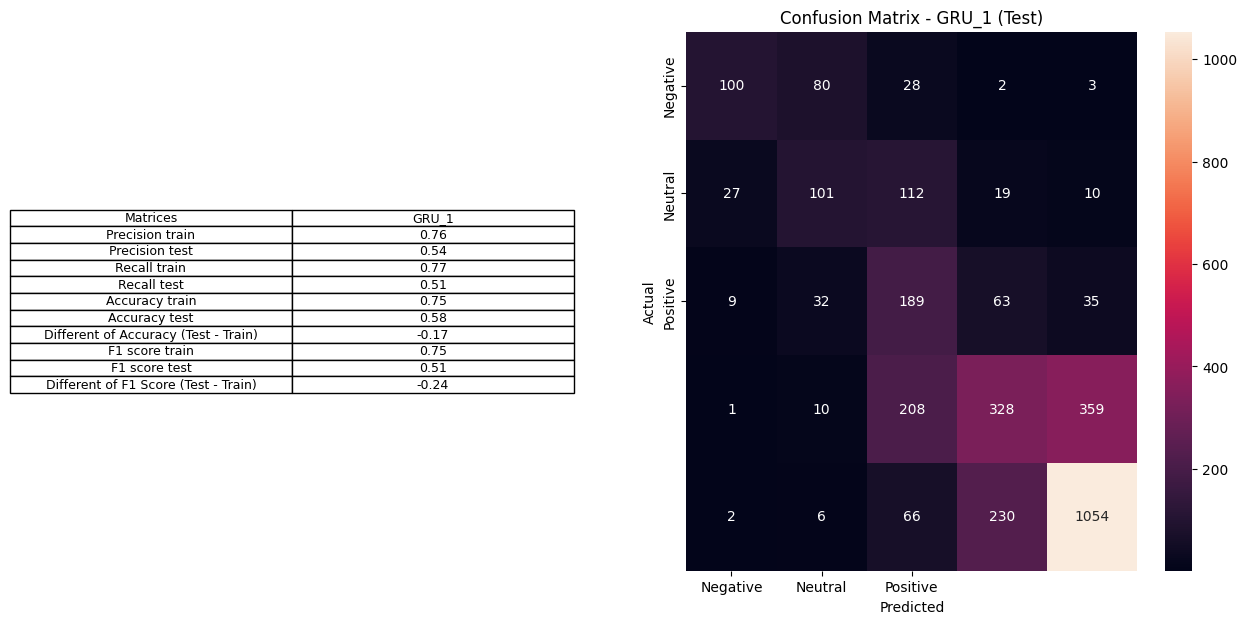

In [60]:
# Menampilkan table nilai evaluasi (macro average) dan confussion matrix
confuss(ytest_predGRU_max, 'GRU_1', matriks)

In [61]:
# Clear Session
import os
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Membuat arsitektur
model_gru_2 = Sequential()
model_gru_2.add(text_vectorization)
model_gru_2.add(embedding)
model_gru_2.add(Bidirectional(GRU(10, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed))))
model_gru_2.add(Dropout(0.2))
# model_gru_2.add(BatchNormalization())
model_gru_2.add(Bidirectional(GRU(10, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed))))
model_gru_2.add(Dropout(0.2))
# model_gru_2.add(BatchNormalization())
model_gru_2.add(Dense(6, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)))

# Compile arsitektur dan parameter - parameternya
model_gru_2.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

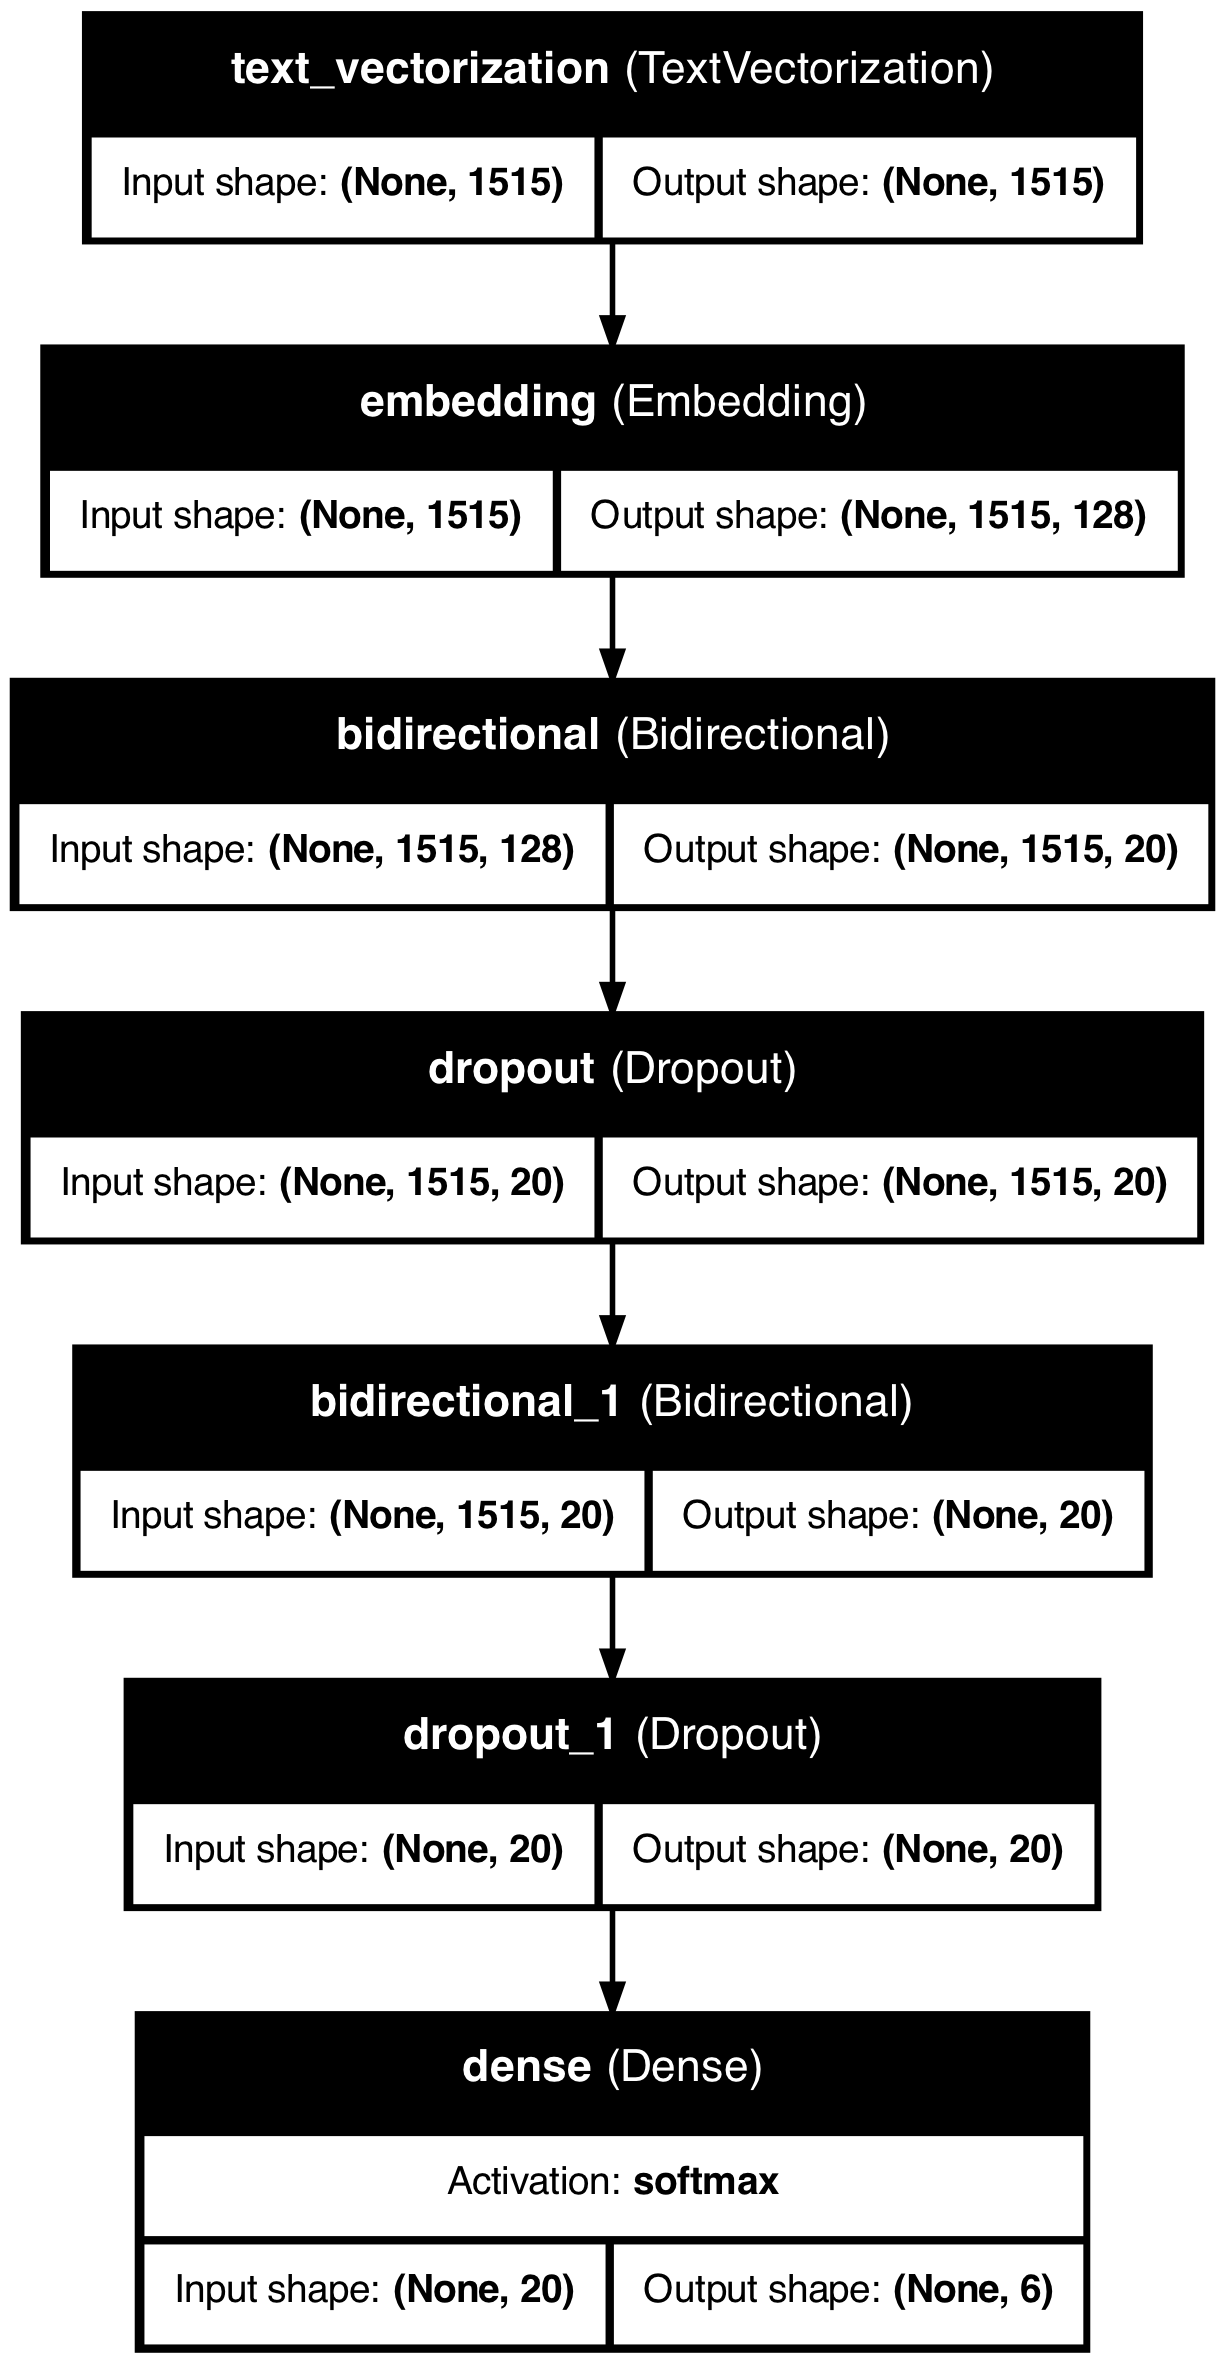

In [63]:
# Ensure the model is built before plotting by providing input shape
# Assuming your input shape is (batch_size, sequence_length), e.g., (None, 100)
model_gru_2.build(input_shape=(None, 100))

# Menampilkan diagram proses
tf.keras.utils.plot_model(model_gru_2, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [64]:
# Proses training model dan validasi
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
model_gru_2_hist = model_gru_2.fit(Xtrain, ytrain_ohe, epochs=100, validation_data=(Xval, yval_ohe),batch_size=32, class_weight=class_weight_dict, callbacks=[early_stopping])


Epoch 1/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 617s 1s/step - accuracy: 0.4294 - loss: 1.4051 - val_accuracy: 0.5723 - val_loss: 0.9855
Epoch 2/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 599s 1s/step - accuracy: 0.6426 - loss: 0.8270 - val_accuracy: 0.5804 - val_loss: 1.0077
Epoch 3/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 607s 1s/step - accuracy: 0.7257 - loss: 0.6286 - val_accuracy: 0.5809 - val_loss: 1.0768
Epoch 4/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 603s 1s/step - accuracy: 0.7789 - loss: 0.5012 - val_accuracy: 0.5580 - val_loss: 1.1953
Epoch 5/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 621s 1s/step - accuracy: 0.8208 - loss: 0.4226 - val_accuracy: 0.5333 - val_loss: 1.3717
Epoch 6/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 596s 1s/step - accuracy: 0.8513 - loss: 0.3450 - val_accuracy: 0.5746 - val_loss: 1.3909
Epoch 7/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 601s 1s/step - accuracy: 0.8794 - loss: 0.2870 - val_accuracy: 0.5695 - val_loss: 1.4791
Epoch 8/100
490/490 ━━━━━━━━━━━━━━━━━━━━ 422s 861ms/step - accuracy: 0.8943 - loss: 0.2594

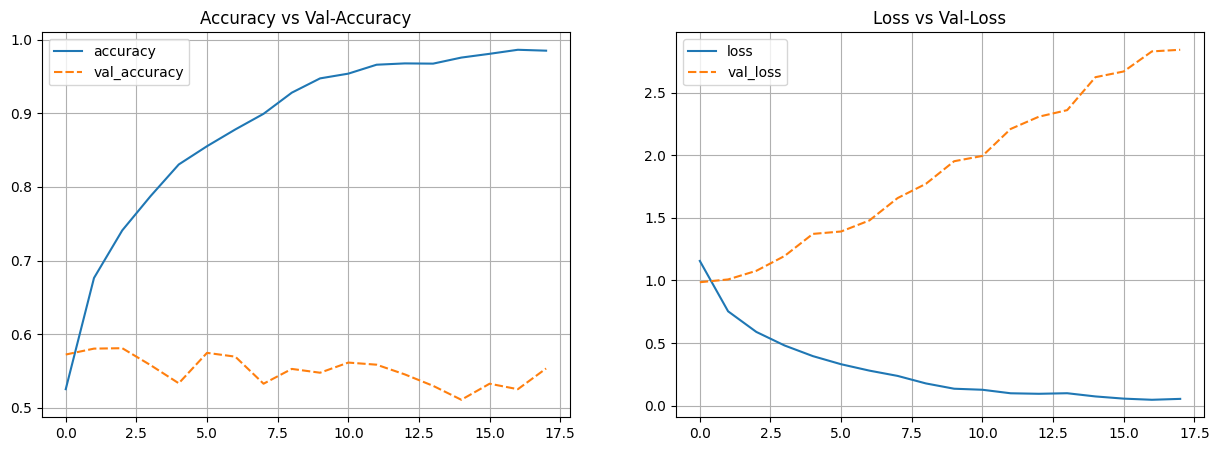

In [65]:
# Membuat dataframe nilai accuracy dan loss 
model_gru_2_hist_df = pd.DataFrame(model_gru_2_hist.history)

# Membuat figure perbandingan nilai accuracy dataset training dengan nilai loss dataset validation
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_gru_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

# Membuat figure perbandingan nilai loss dataset training dengan nilai loss dataset validation
plt.subplot(1, 2, 2)
sns.lineplot(data=model_gru_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [66]:
# Memprediksi dataset test
ytest_predgru2 = model_gru_2.predict(Xtest) 
ytrain_predgru2 = model_gru_2.predict(Xtrain)

97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step
490/490 ━━━━━━━━━━━━━━━━━━━━ 57s 117ms/step


In [67]:
# Evaluate Test Set
result_gru2 = model_gru_2.evaluate(Xtest, ytest_ohe)
result_gru2

97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.5716 - loss: 1.0702


[1.0650943517684937, 0.5741704702377319]

In [68]:
# Evaluate traing Set
result_gru2_train = model_gru_2.evaluate(Xtrain, ytrain_ohe)
result_gru2_train

490/490 ━━━━━━━━━━━━━━━━━━━━ 56s 113ms/step - accuracy: 0.8364 - loss: 0.4626


[0.4657081961631775, 0.835279107093811]

In [69]:
# Get class with maximum probability
ytest_predgru2_max = np.argmax(ytest_predgru2, axis=-1)
ytrain_predgru2_max = np.argmax(ytrain_predgru2, axis=-1)

In [70]:
## Display Classification Report
print(classification_report(ytest, ytest_predgru2_max, target_names=np.array(class_name)))

              precision    recall  f1-score   support

    Terrible       0.61      0.57      0.59       213
         Bad       0.45      0.44      0.44       269
     Average       0.34      0.33      0.34       328
        Good       0.46      0.45      0.46       906
   Excellent       0.72      0.74      0.73      1358

    accuracy                           0.57      3074
   macro avg       0.51      0.51      0.51      3074
weighted avg       0.57      0.57      0.57      3074



In [71]:
# Membuat dataframe perbandingan nilai matriks evaluasi antara test dan train (macro average)
matrices(ytrain_predgru2, ytest_predgru2, 'GRU_2')

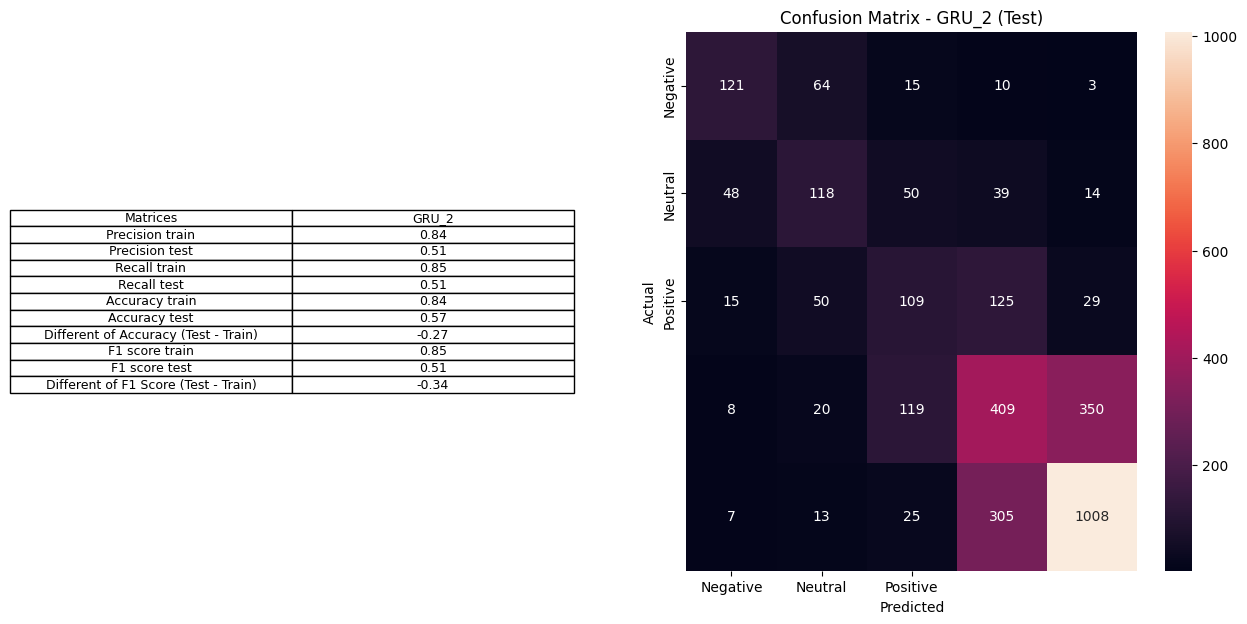

In [72]:
# Menampilkan table nilai evaluasi (macro average) dan confussion matrix
confuss(ytest_predgru2_max, 'GRU_2', matriks)

In [73]:
# Melihat dataframe matriks evaluasi
matriks

,Matrices,GRU_1,GRU_2
0,Precision train,0.76,0.84
1,Precision test,0.54,0.51
2,Recall train,0.77,0.85
3,Recall test,0.51,0.51
4,Accuracy train,0.75,0.84
5,Accuracy test,0.58,0.57
6,Different of Accuracy (Test - Train),-0.17,-0.27
7,F1 score train,0.75,0.85
8,F1 score test,0.51,0.51
9,Different of F1 Score (Test - Train),-0.24,-0.34


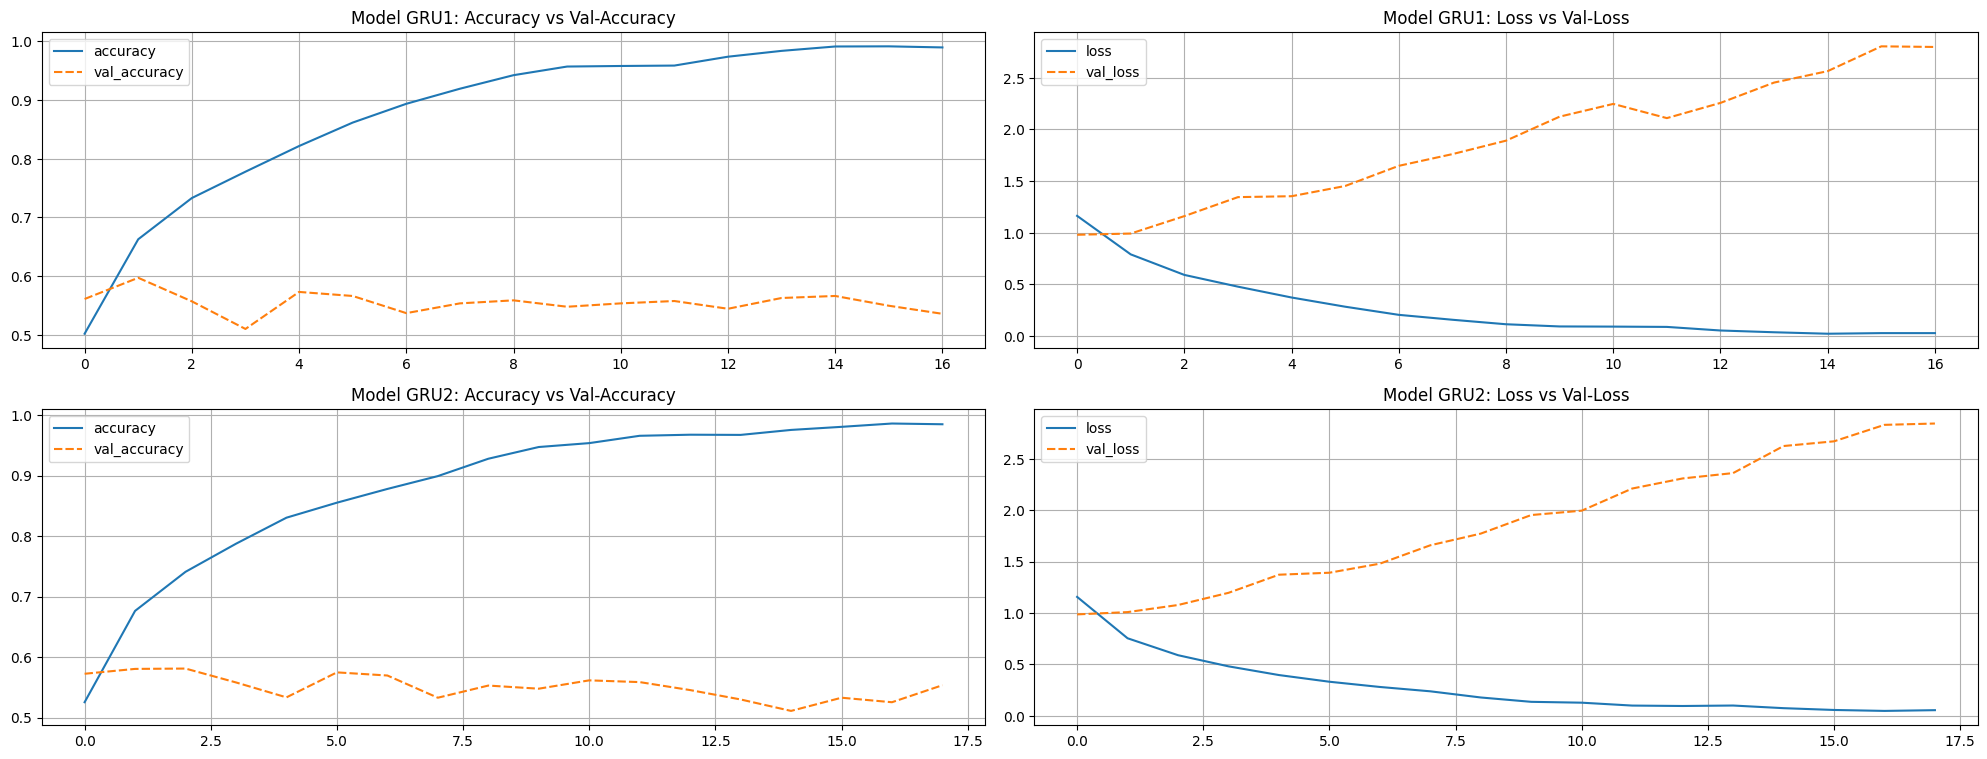

In [74]:
# Membuat grafik accuracy dan loss untuk setiao model
plt.figure(figsize=(20, 15))

# Grafik model GRU1
plt.subplot(4, 2, 1)
sns.lineplot(data=model_gru_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Model GRU1: Accuracy vs Val-Accuracy')

plt.subplot(4, 2, 2)
sns.lineplot(data=model_gru_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Model GRU1: Loss vs Val-Loss')

# Grafik model GRU2
plt.subplot(4, 2, 3)
sns.lineplot(data=model_gru_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Model GRU2: Accuracy vs Val-Accuracy')

plt.subplot(4, 2, 4)
sns.lineplot(data=model_gru_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Model GRU2: Loss vs Val-Loss')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [77]:
with open('class_name.pkl', 'wb') as file1:
    pickle.dump(class_name, file1)

with open('stopwords.txt', 'w') as file2:
    json.dump(list(stpwds_en), file2)

with open('text_preprocessing.pkl', 'wb') as file3:
    dill.dump(Review_preprocessing, file3)

model_gru_2.save('model.keras')